In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
results = pd.read_csv('results.csv', sep =';')


In [30]:
prompts = pd.read_excel(
    "result_prompts.xlsx")

In [31]:
prompts = prompts.iloc [:,1:]
results = results.iloc [:,1:]

In [32]:
prompts

,qwen3:0.6b,mistral:latest,llama3.1:latest,qwen2.5:latest,gemma3:1b,gemma3:latest
0,The question seems to reference a specific dei...,"The deity you're referring to is Brahma, the ...",You're referring to a mythological story!\n\nT...,The god who was born from a lotus flower that ...,That's a fantastic and fascinating detail! The...,That would be **Lakshmi**.\n\nHere's the story...
1,"The figure depicted as a **cosmic dancer**, **...",The figure you're referring to is Ardhanari-i...,That's quite a descriptive question!\n\nBased ...,The figure you're describing sounds like Natar...,You're likely thinking of **Albus Dumbledore**...,The figure you're describing is most commonly ...
2,The dish is called **Yogurt Tomato Chicken**. ...,The dish you're describing is often called Ch...,"Based on your description, I think you might b...",The dish you're describing sounds like **Shahi...,That dish is most commonly known as **Chicken ...,That dish is most likely **Chicken Tikka Masal...
3,"The dish described as ""Cauliflower in a tomato...","The dish you're referring to sounds like ""Bha...",A delicious Indian dish!\n\nBased on your desc...,The dish you're describing sounds like **Palak...,The dish you're referring to is **Dhal**.\n\nD...,The dish you're likely thinking of is **Gobi M...
4,The holiday that symbolizes the spiritual vict...,"The holiday you are referring to is Diwali, a...",You're referring to a significant festival in ...,The holiday you're referring to is likely Diwa...,The holiday most widely associated with the sp...,The holiday that most powerfully symbolizes th...
...,...,...,...,...,...,...
205,"In Russia, the traditional wooden nesting doll...",The traditional wooden nesting doll set from ...,The traditional Russian wooden nesting doll se...,The traditional wooden nesting doll set from R...,"In Russia, the traditional wooden nesting doll...",The traditional wooden nesting doll set in Rus...
206,"In Ukraine, the traditional embroidered shirt ...",The traditional embroidered shirt in Ukraine ...,The traditional embroidered shirt in Ukraine i...,The traditional embroidered shirt in Ukraine i...,"In Ukraine, the traditional embroidered shirt,...",The traditional embroidered shirt in Ukraine i...
207,The traditional filled dumpling in Poland is c...,The traditional filled dumpling dish in Polan...,The traditional filled dumpling dish from Pola...,The traditional filled dumpling dish in Poland...,"In Poland, the traditional filled dumpling dis...",The traditional filled dumpling dish in Poland...
208,"In Hungary, the paprika-spiced stew made with ...",The paprika-spiced stew made with meat and ve...,You're probably thinking of a traditional Hung...,The paprika-spiced stew made with meat and veg...,The paprika-spiced stew made with meat and veg...,The paprika-spiced stew made with meat and veg...


In [41]:
rename_map = {
    "mistral:latest": "mistral-7.2B",
    "llama3.1:latest": "llama-3.1-8B",
    "gemma3:latest": "gemma-3-4.3B",
    "qwen2.5:latest": "qwen-2.5-7.6B",
    "gemma3:1b": "gemma-3-1B",
    "qwen3:0.6b": "qwen-3-0.6B",
}



In [47]:
results.columns = ["qwen-3-0.6B","mistral-7.2B","llama-3.1-8B","qwen-2.5-7.6B","gemma-3-1B","gemma-3-4.3B"]
results

,qwen-3-0.6B,mistral-7.2B,llama-3.1-8B,qwen-2.5-7.6B,gemma-3-1B,gemma-3-4.3B
0,False,True,True,True,False,False
1,False,True,True,True,False,True
2,False,True,True,True,False,True
3,False,False,False,False,False,False
4,False,True,True,True,False,True
...,...,...,...,...,...,...
205,False,True,True,True,False,True
206,False,True,True,False,False,True
207,False,True,True,True,True,True
208,False,True,True,True,False,True


In [49]:
results

,qwen-3-0.6B,mistral-7.2B,llama-3.1-8B,qwen-2.5-7.6B,gemma-3-1B,gemma-3-4.3B
0,False,True,True,True,False,False
1,False,True,True,True,False,True
2,False,True,True,True,False,True
3,False,False,False,False,False,False
4,False,True,True,True,False,True
...,...,...,...,...,...,...
205,False,True,True,True,False,True
206,False,True,True,False,False,True
207,False,True,True,True,True,True
208,False,True,True,True,False,True


In [ ]:
model_stats = (
    results
        .agg(["mean", "std", "count"])
        .   
        .reset_index()
        .rename(columns={"index": "model"})
)

model_stats = model_stats.sort_values(['mean'], ascending= False)
model_stats = model_stats.reset_index().iloc[:,1:]
model_stats

,model,mean,std,count
0,mistral-7.2B,0.780952,0.414589,210.0
1,llama-3.1-8B,0.766667,0.423963,210.0
2,gemma-3-4.3B,0.704762,0.457240,210.0
3,qwen-2.5-7.6B,0.685714,0.465340,210.0
4,gemma-3-1B,0.342857,0.475798,210.0
5,qwen-3-0.6B,0.123810,0.330151,210.0


C:\Users\danci\AppData\Local\Temp\ipykernel_12892\3696065595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_stats, x="model", y="mean", palette="Set2", order=model_stats['model'])


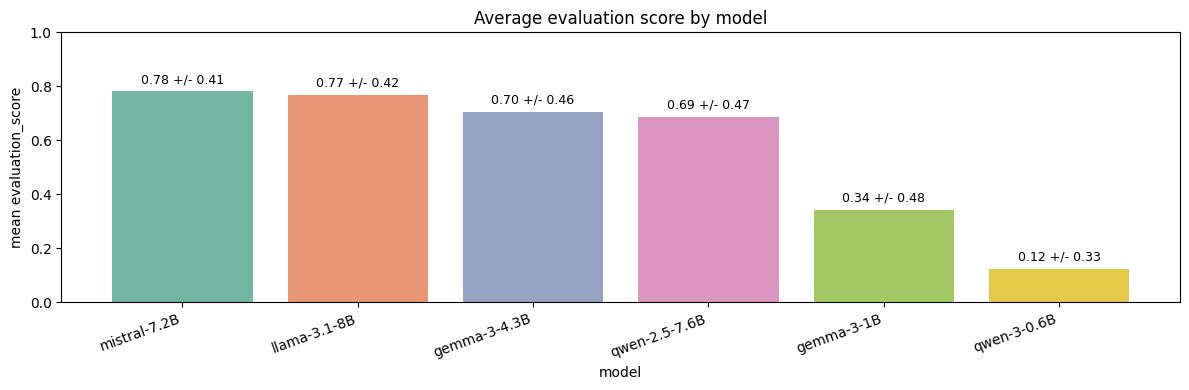

In [63]:

plt.figure(figsize=(12, 4))
sns.barplot(data=model_stats, x="model", y="mean", palette="Set2", order=model_stats['model'])
plt.title("Average evaluation score by model")
plt.xlabel("model")
plt.ylabel("mean evaluation_score")
plt.ylim(0, 1)
plt.xticks(rotation=20, ha="right")
plt.errorbar(
    x=np.arange(len(model_stats['model'])),
    y=model_stats["mean"].values,
    fmt="none",
    c="black",
    capsize=4,
    linewidth=1,
)
for i, row in model_stats.iterrows():
    label = f"{row['mean']:.2f} +/- {row['std']:.2f}"
    plt.text(i, row["mean"] + 0.02, label, ha="center", va="bottom", fontsize=9)
plt.tight_layout()

In [67]:
questions = pd.read_csv('../nlp(cultural).csv',sep=';')
questions = questions.iloc[:,1:7]

In [79]:
subcategory_counts.sort_values(ascending=False)

subcategory
food            82
culture         24
history         17
customs         15
geography       15
attire          13
music           10
religion         8
holiday          7
dance            6
ethincs          3
festival         3
architecture     2
language         2
literature       2
transport        1
Name: type, dtype: int64

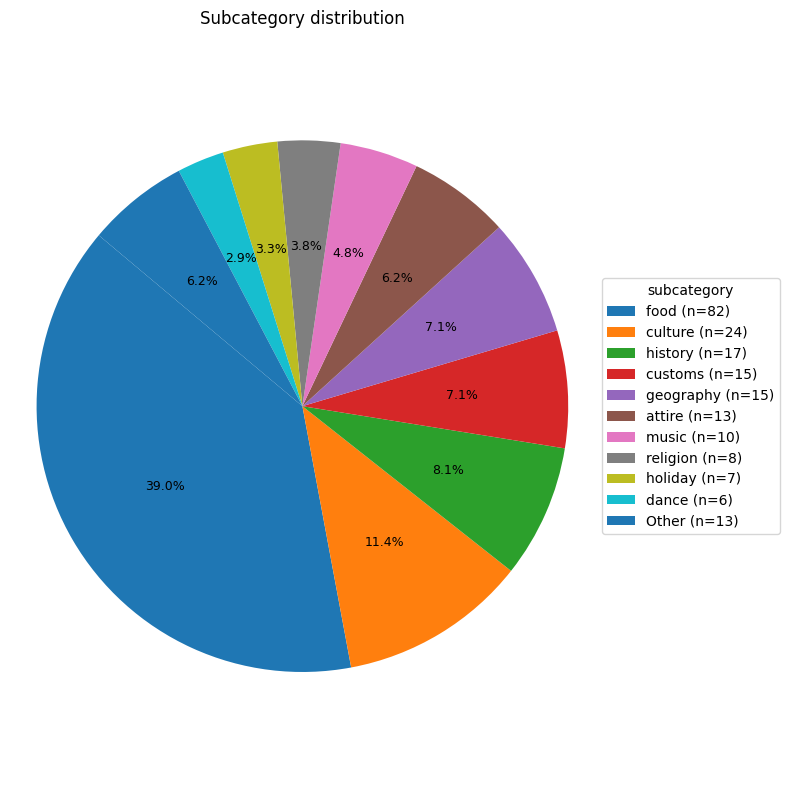

In [80]:
import matplotlib.pyplot as plt

# policzone dane
subcategory_counts = questions.groupby("subcategory").count().iloc[:, 1]
subcategory_counts = subcategory_counts.sort_values(ascending=False)
top_n = 10

top_counts = subcategory_counts.head(top_n)
other_count = subcategory_counts.iloc[top_n:].sum()

labels = top_counts.index.tolist()
sizes = top_counts.values.tolist()

if other_count > 0:
    labels.append("Other")
    sizes.append(other_count)

plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    sizes,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"fontsize": 9},
)

legend_labels = [f"{l} (n={s})" for l, s in zip(labels, sizes)]

plt.legend(
    wedges,
    legend_labels,
    title="subcategory",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.title("Subcategory distribution")
plt.axis("equal")
plt.tight_layout()
plt.show()


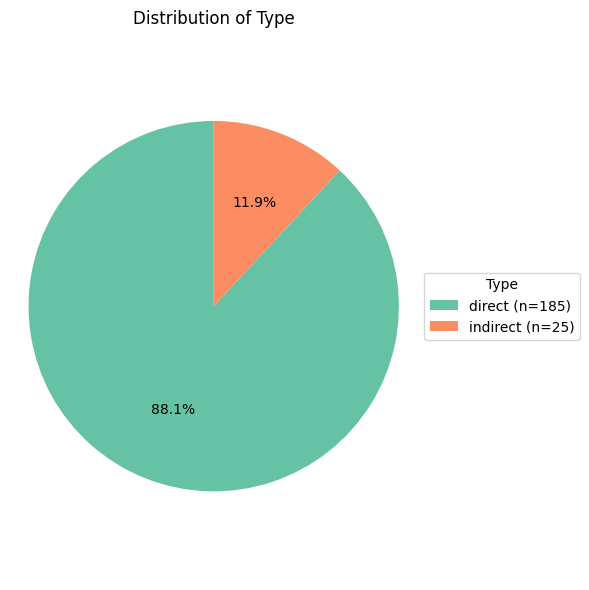

In [ ]:
import matplotlib.pyplot as plt


type_counts = questions['type'].value_counts()

labels = type_counts.index.tolist()
sizes = type_counts.values.tolist()

plt.figure(figsize=(6, 6))

wedges, texts, autotexts = plt.pie(
    sizes,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66c2a5", "#fc8d62"],  
    textprops={"fontsize": 10},
)


legend_labels = [f"{l} (n={s})" for l, s in zip(labels, sizes)]
plt.legend(
    wedges,
    legend_labels,
    title="Type",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

plt.title("Distribution of Type")
plt.axis("equal")  
plt.tight_layout()
plt.show()



In [81]:
questions

,question,type,subcategory,country,correct_answers,correct_answers_2
0,Which god was born from lotus flower that grew...,direct,religion,"[""India""]",['Brahma'],[]
1,"Who is depicted as a cosmic dancer, naked asce...",direct,religion,"[""India""]",['Shiva'],[]
2,"What is the name of the dish, which can be des...",direct,food,"[""India""]","['chicken tikka masala', 'chicken tikka', 'but...",[]
3,"What is the name of the dish, popular in India...",direct,food,"[""India""]",['gobhi matar'],[]
4,What is the holiday that symbolises the spirit...,direct,culture,"[""India""]","['Diwali', 'Dipavali']",[]
...,...,...,...,...,...,...
205,"In Russia, what is the traditional wooden nest...",direct,culture,['Russia'],"['Matryoshka', 'Matryoshka dolls']",[]
206,"In Ukraine, what is the traditional embroidere...",direct,attire,['Ukraine'],['Vyshyvanka'],[]
207,"In Poland, what is the traditional filled dump...",direct,food,['Poland'],['Pierogi'],[]
208,"In Hungary, what is the paprika-spiced stew ma...",direct,food,['Hungary'],"['Goulash', 'Gulyás']",[]


In [ ]:
df = questions.copy()
df_models = results.copy()

df = pd.concat([df, df_models], axis=1)
df

,question,type,subcategory,country,correct_answers,correct_answers_2,qwen-3-0.6B,mistral-7.2B,llama-3.1-8B,qwen-2.5-7.6B,gemma-3-1B,gemma-3-4.3B
0,Which god was born from lotus flower that grew...,direct,religion,"[""India""]",['Brahma'],[],False,True,True,True,False,False
1,"Who is depicted as a cosmic dancer, naked asce...",direct,religion,"[""India""]",['Shiva'],[],False,True,True,True,False,True
2,"What is the name of the dish, which can be des...",direct,food,"[""India""]","['chicken tikka masala', 'chicken tikka', 'but...",[],False,True,True,True,False,True
3,"What is the name of the dish, popular in India...",direct,food,"[""India""]",['gobhi matar'],[],False,False,False,False,False,False
4,What is the holiday that symbolises the spirit...,direct,culture,"[""India""]","['Diwali', 'Dipavali']",[],False,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
205,"In Russia, what is the traditional wooden nest...",direct,culture,['Russia'],"['Matryoshka', 'Matryoshka dolls']",[],False,True,True,True,False,True
206,"In Ukraine, what is the traditional embroidere...",direct,attire,['Ukraine'],['Vyshyvanka'],[],False,True,True,False,False,True
207,"In Poland, what is the traditional filled dump...",direct,food,['Poland'],['Pierogi'],[],False,True,True,True,True,True
208,"In Hungary, what is the paprika-spiced stew ma...",direct,food,['Hungary'],"['Goulash', 'Gulyás']",[],False,True,True,True,False,True


In [ ]:
model_cols = results.columns.tolist()

model_stats = df.groupby("subcategory")[model_cols].agg(
    ["mean", "std", "count"]
)

model_stats = model_stats.reset_index()


In [ ]:
subcategory_counts = df['subcategory'].value_counts()

top_n = 5
top_subcategories = subcategory_counts.head(top_n).index.tolist()

df_plot = df.copy()
df_plot['subcategory_top'] = df_plot['subcategory'].apply(
    lambda x: x if x in top_subcategories else "Other"
)


agg_df = df_plot.groupby("subcategory_top")[results.columns].mean().reset_index()

long_df = agg_df.melt(
    id_vars="subcategory_top",
    value_vars=results.columns.tolist(),
    var_name="model",
    value_name="accuracy"
)


In [98]:
df_plot['subcategory_top']


0        Other
1        Other
2         food
3         food
4      culture
        ...   
205    culture
206      Other
207       food
208       food
209       food
Name: subcategory_top, Length: 210, dtype: object

In [99]:
subcategory_order = (
    df_plot['subcategory_top']
    .value_counts()
    .sort_values(ascending=False)
    .index
    .tolist()
)

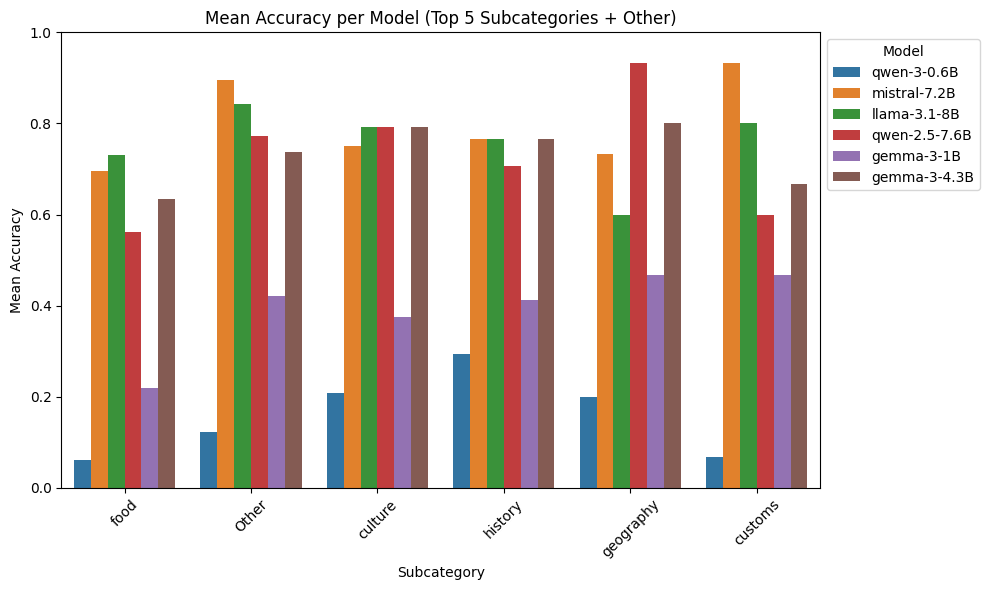

In [100]:
plt.figure(figsize=(10, 6))

sns.barplot(
    data=long_df,
    x="subcategory_top",
    y="accuracy",
    hue="model",
    palette="tab10",
    order=subcategory_order   
)

plt.title("Mean Accuracy per Model (Top 5 Subcategories + Other)")
plt.xlabel("Subcategory")
plt.ylabel("Mean Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title="Model", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

agg_stats = df_plot.groupby("subcategory_top")[results.columns].agg(["mean", "std"])

agg_stats = agg_stats.reset_index()
agg_stats["mean_accuracy"] = agg_stats[results.columns].mean(axis=1)
agg_stats["std_accuracy"] = agg_stats[results.columns].std(axis=1)

subcategory_order = (
    df_plot['subcategory_top']
    .value_counts()
    .sort_values(ascending=False)
    .index
    .tolist()
)



C:\Users\danci\AppData\Local\Temp\ipykernel_12892\3067093036.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=means, palette="Set2")


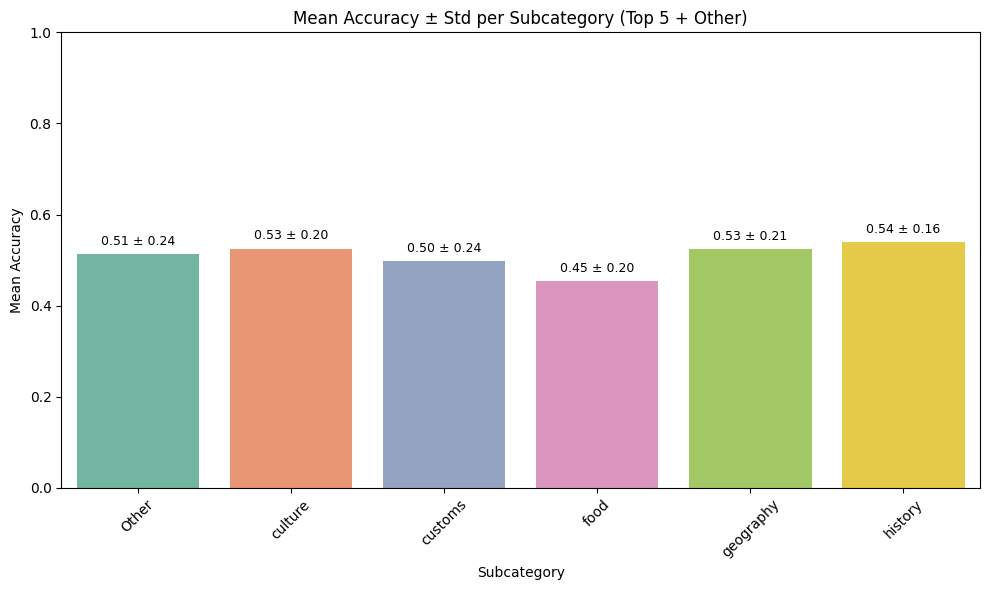

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

means = agg_stats["mean_accuracy"]
stds = agg_stats["std_accuracy"]
labels = agg_stats["subcategory_top"]

plt.figure(figsize=(10, 6))

sns.barplot(x=labels, y=means, palette="Set2")

for i, (mean, std) in enumerate(zip(means, stds)):
    plt.text(i, mean + 0.02, f"{mean:.2f} ± {std:.2f}", ha="center", fontsize=9)

plt.ylim(0, 1)
plt.xlabel("Subcategory")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy ± Std per Subcategory (Top 5 + Other)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [111]:
multi = pd.read_csv('../qwen_results.csv',sep=';')
multi.head()

,qwen3-vl:2b
0,False
1,True
2,False
3,False
4,False


In [120]:
counts = multi.value_counts().replace("F", False)


C:\Users\danci\AppData\Local\Temp\ipykernel_12892\4025224396.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[col], y=[accuracy], palette="Set2")


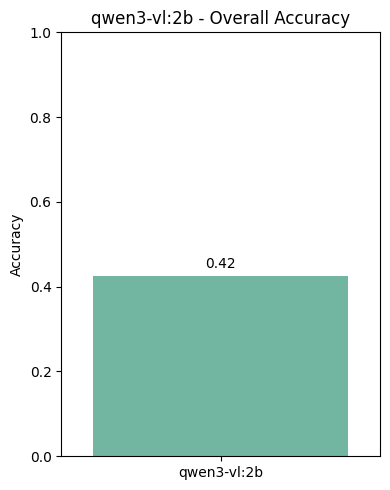

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col = "qwen3-vl:2b"

multi[col] = multi[col].replace("F", False)

accuracy = multi[col].mean()

plt.figure(figsize=(4, 5))

sns.barplot(x=[col], y=[accuracy], palette="Set2")

plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha="center", fontsize=10)

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title(f"{col} - Overall Accuracy")
plt.tight_layout()
plt.show()



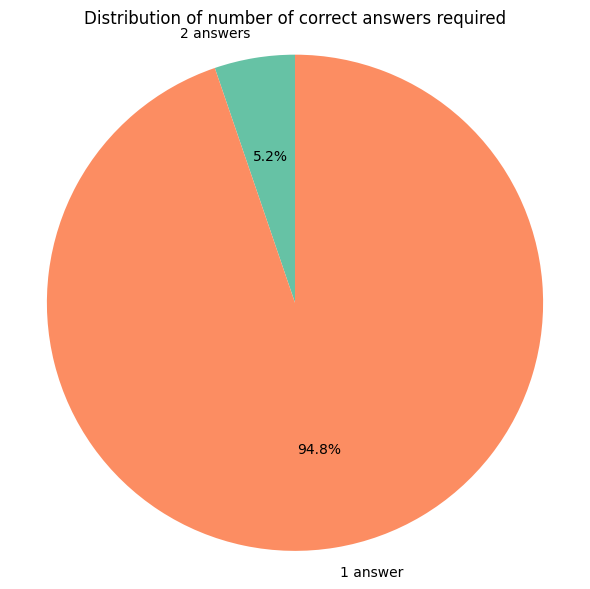

In [127]:
import matplotlib.pyplot as plt

# dane
labels = ["2 answers", "1 answer"]
sizes = [11, 199]

plt.figure(figsize=(6, 6))
colors = ["#66c2a5", "#fc8d62"]

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={"fontsize": 10}
)

plt.title("Distribution of number of correct answers required")
plt.axis("equal")  
plt.tight_layout()
plt.show()

